In [1]:
from core import *
import requests, json

In [2]:
dataset_id = {
    'all': 'd_a9345e1249b5ac6d5e998217da4ac3d4', 
}
dataset_mode = 'all'

In [3]:
response = requests.get(
    'https://data.gov.sg/api/action/datastore_search', 
    params={
        'resource_id': dataset_id[dataset_mode],
        'limit': 999
    }
)
print(json.dumps(response.json(), indent=2))

{
  "help": "https://data.gov.sg/api/3/action/help_show?name=datastore_search",
  "success": true,
  "result": {
    "resource_id": "d_a9345e1249b5ac6d5e998217da4ac3d4",
    "fields": [
      {
        "type": "text",
        "id": "DataSeries"
      },
      {
        "type": "numeric",
        "id": "2023"
      },
      {
        "type": "numeric",
        "id": "2022"
      },
      {
        "type": "numeric",
        "id": "2021"
      },
      {
        "type": "numeric",
        "id": "2020"
      },
      {
        "type": "numeric",
        "id": "2019"
      },
      {
        "type": "numeric",
        "id": "2018"
      },
      {
        "type": "numeric",
        "id": "2017"
      },
      {
        "type": "numeric",
        "id": "2016"
      },
      {
        "type": "numeric",
        "id": "2015"
      },
      {
        "type": "numeric",
        "id": "2014"
      },
      {
        "type": "numeric",
        "id": "2013"
      },
      {
        "type": "numeri

In [4]:
data = response.json()
records = data['result']['records']
df = pd.DataFrame(records)
df['DataSeries'] = df['DataSeries'].str.strip()
df['SubDataSeries'] = df['DataSeries'].str.extract(r'(?i)\b(male|female)s?\b').ffill()
df['DataSeries'] = df['DataSeries'].str.extract(r'(?i)\b(\d+.*)\b', expand=True)
df['DataSeries'] = df['DataSeries'].str.replace(r'(?i)\W*\byears?\b|\s+', '', regex=True).str.replace(r'(?i)\W*over\b', '+', regex=True).str.strip()
df = df.dropna(subset=['DataSeries'])
df = df.rename(columns={'DataSeries': 'age_group', 'SubDataSeries': 'gender'}).drop(columns=['_id'])
df['age_group'] = pd.Categorical(df['age_group'], ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+'], ordered=True)
df['gender'] = pd.Categorical(df['gender'], ['Female', 'Male'], ordered=False)
for col in df.drop(columns=['gender', 'age_group']).columns:
    try:
        df[col] = df[col].astype('float').div(1000)
    except:
        df[col] = df[col].str.strip().where(df[col].str.contains(r'\d+(?:\.\d+)?', na=False)).astype('float').div(1000)
df = df.groupby(by=['gender', 'age_group'], observed=True).sum()
df = df.rename(columns=int).transpose().sort_index(axis=0).sort_index(axis=1).copy(deep=True)
# df = df.set_index(keys=['brides', 'grooms', 'comparison']).rename(columns=int).astype('int').transpose().sort_index(axis=0).sort_index(axis=1).copy(deep=True)
# df = df.set_index(keys=['brides', 'grooms']).rename(columns=int).astype('int').unstack(level=0).sort_index(axis=0).sort_index(axis=1).copy(deep=True)
assert isinstance(df, pd.DataFrame)
display_all_columns(df)

gender     Female                                                          \
age_group   15-19   20-24   25-29   30-34   35-39   40-44   45-49   50-54   
1980       0.0184  0.1105  0.1365  0.0743  0.0436  0.0220  0.0092  0.0026   
1981       0.0178  0.1095  0.1397  0.0777  0.0501  0.0262  0.0144  0.0038   
1982       0.0172  0.1004  0.1195  0.0759  0.0478  0.0237  0.0113  0.0030   
1983       0.0157  0.0851  0.1045  0.0636  0.0368  0.0191  0.0096  0.0033   
1984       0.0156  0.1016  0.1243  0.0681  0.0413  0.0167  0.0084  0.0028   
1985       0.0152  0.0955  0.1118  0.0626  0.0334  0.0185  0.0072  0.0033   
1986       0.0124  0.0775  0.0941  0.0592  0.0319  0.0173  0.0093  0.0037   
1987       0.0119  0.0879  0.1243  0.0743  0.0378  0.0193  0.0092  0.0028   
1988       0.0108  0.0946  0.1302  0.0767  0.0381  0.0207  0.0079  0.0036   
1989       0.0107  0.0885  0.1144  0.0767  0.0358  0.0203  0.0086  0.0034   
1990       0.0110  0.0848  0.1330  0.0691  0.0366  0.0147  0.0067  0.0036   
1991       0.0108  0.0847  0.1380  0.0764  0.0374  0.0156  0.0088  0.0038   
1992       0.0101  0.0788  0.1335  0.0744  0.0367  0.0175  0.0092  0.0037   
1993       0.0088  0.0720  0.1328  0.0745  0.0383  0.0179  0.0109  0.0033   
1994       0.0079  0.0710  0.1342  0.0776  0.0388  0.0167  0.0099  0.0032   
1995       0.0075  0.0701  0.1357  0.0765  0.0373  0.0169  0.0083  0.0033   
1996       0.0070  0.0654  0.1373  0.0740  0.0357  0.0190  0.0082  0.0036   
1997       0.0066  0.0752  0.1491  0.0822  0.0401  0.0196  0.0099  0.0053   
1998       0.0076  0.0587  0.1239  0.0705  0.0346  0.0168  0.0085  0.0050   
1999       0.0072  0.0663  0.1510  0.0848  0.0384  0.0180  0.0097  0.0046   
2000       0.0074  0.0543  0.1330  0.0698  0.0324  0.0172  0.0082  0.0042   
2001       0.0069  0.0515  0.1228  0.0702  0.0334  0.0148  0.0074  0.0034   
2002       0.0063  0.0501  0.1256  0.0752  0.0329  0.0141  0.0079  0.0034   
2003       0.0053  0.0459  0.1260  0.0751  0.0292  0.0159  0.0089  0.0034   
2004       0.0050  0.0433  0.1112  0.0759  0.0341  0.0164  0.0089  0.0041   
2005       0.0046  0.0385  0.1141  0.0706  0.0321  0.0150  0.0091  0.0043   
2006       0.0039  0.0374  0.1104  0.0789  0.0335  0.0175  0.0083  0.0043   
2007       0.0038  0.0340  0.1115  0.0842  0.0397  0.0183  0.0090  0.0044   
2008       0.0031  0.0309  0.1145  0.0798  0.0388  0.0187  0.0096  0.0043   
2009       0.0026  0.0269  0.1085  0.0882  0.0392  0.0173  0.0101  0.0055   
2010       0.0028  0.0226  0.0990  0.0810  0.0363  0.0162  0.0104  0.0055   
2011       0.0024  0.0235  0.1080  0.0960  0.0424  0.0207  0.0102  0.0061   
2012       0.0023  0.0244  0.1067  0.0962  0.0432  0.0210  0.0105  0.0057   
2013       0.0022  0.0213  0.0974  0.0892  0.0446  0.0194  0.0102  0.0052   
2014       0.0017  0.0223  0.1038  0.1053  0.0443  0.0195  0.0117  0.0054   
2015       0.0017  0.0209  0.1072  0.1065  0.0482  0.0211  0.0104  0.0067   
2016       0.0017  0.0199  0.1068  0.1058  0.0489  0.0213  0.0117  0.0055   
2017       0.0015  0.0198  0.1088  0.1016  0.0512  0.0224  0.0120  0.0056   
2018       0.0012  0.0184  0.0998  0.1000  0.0480  0.0220  0.0121  0.0063   
2019       0.0012  0.0164  0.0886  0.0955  0.0468  0.0214  0.0110  0.0065   
2020       0.0012  0.0167  0.0799  0.0816  0.0399  0.0173  0.0091  0.0056   
2021       0.0011  0.0188  0.1009  0.1064  0.0490  0.0192  0.0095  0.0068   
2022       0.0012  0.0176  0.0997  0.1174  0.0560  0.0225  0.0129  0.0076   
2023       0.0009  0.0153  0.0939  0.1049  0.0536  0.0249  0.0121  0.0078   

gender                               Male                                  \
age_group   55-59   60-64     65+   15-19   20-24   25-29   30-34   35-39   
1980       0.0021  0.0003  0.0000  0.0017  0.0499  0.1401  0.1380  0.1063   
1981       0.0032  0.0002  0.0000  0.0016  0.0518  0.1380  0.1438  0.1233   
1982       0.0019  0.0003  0.0000  0.0016  0.0460  0.1263  0.1312  0.1222   
1983       0.0015  0.0002  0.0000  0.0014  0.0388  0.1049  0.1121  0.084

In [5]:
df_cohort = df.rename_axis(index='year').stack(level=['age_group']).reset_index(drop=False).copy(deep=True)
df_cohort['cohort'] = df_cohort['age_group'].str.extract(r'(?i)(\d+)')
df_cohort['cohort'] = df_cohort['year'].subtract(df_cohort['cohort'].astype('int')).map(lambda val: f'{val-4:.0f}-{val:.0f}')
for col in ['age_group']:
    df_cohort[col] = pd.Categorical(df_cohort[col], df_cohort[col].sort_values().unique(), ordered=True)
df_cohort['measure'] = 'Marriage Rate'
df_cohort = df_cohort.drop(columns=['year']).set_index(keys=['cohort', 'age_group', 'measure'], append=False).sort_index(axis=1).sort_index(axis=0).copy(deep=True)
df_cohort = df_cohort.T.stack(level=['age_group']).unstack(level=['gender']).sort_index(axis=1).sort_index(axis=0).copy(deep=True)
display_all_columns(df_cohort)

/tmp/ipykernel_1875/1462623694.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_cohort = df.rename_axis(index='year').stack(level=['age_group']).reset_index(drop=False).copy(deep=True)
/tmp/ipykernel_1875/1462623694.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_cohort = df_cohort.T.stack(level=['age_group']).unstack(level=['gender']).sort_index(axis=1).sort_index(axis=0).copy(deep=True)


cohort        1911-1915          1912-1916          1913-1917       \
measure   Marriage Rate      Marriage Rate      Marriage Rate        
gender           Female Male        Female Male        Female Male   
age_group                                                            
15-19               NaN  NaN           NaN  NaN           NaN  NaN   
20-24               NaN  NaN           NaN  NaN           NaN  NaN   
25-29               NaN  NaN           NaN  NaN           NaN  NaN   
30-34               NaN  NaN           NaN  NaN           NaN  NaN   
35-39               NaN  NaN           NaN  NaN           NaN  NaN   
40-44               NaN  NaN           NaN  NaN           NaN  NaN   
45-49               NaN  NaN           NaN  NaN           NaN  NaN   
50-54               NaN  NaN           NaN  NaN           NaN  NaN   
55-59               NaN  NaN           NaN  NaN           NaN  NaN   
60-64               NaN  NaN           NaN  NaN           NaN  NaN   
65+                 0.0  0.0           0.0  0.0           0.0  0.0   

cohort        1914-1918          1915-1919             1916-1920          \
measure   Marriage Rate      Marriage Rate         Marriage Rate           
gender           Female Male        Female    Male        Female    Male   
age_group                                                                  
15-19               NaN  NaN           NaN     NaN           NaN     NaN   
20-24               NaN  NaN           NaN     NaN           NaN     NaN   
25-29               NaN  NaN           NaN     NaN           NaN     NaN   
30-34               NaN  NaN           NaN     NaN           NaN     NaN   
35-39               NaN  NaN           NaN     NaN           NaN     NaN   
40-44               NaN  NaN           NaN     NaN           NaN     NaN   
45-49               NaN  NaN           NaN     NaN           NaN     NaN   
50-54               NaN  NaN           NaN     NaN           NaN     NaN   
55-59               NaN  NaN           NaN     NaN           NaN     NaN   
60-64               NaN  NaN           NaN     NaN        0.0003  0.0047   
65+                 0.0  0.0        0.0001  0.0019        0.0001  0.0021   

cohort        1917-1921             1918-1922             1919-1923          \
measure   Marriage Rate         Marriage Rate         Marriage Rate           
gender           Female    Male        Female    Male        Female    Male   
age_group                                                                     
15-19               NaN     NaN           NaN     NaN           NaN     NaN   
20-24               NaN     NaN           NaN     NaN           NaN     NaN   
25-29               NaN     NaN           NaN     NaN           NaN     NaN   
30-34               NaN     NaN           NaN     NaN           NaN     NaN   
35-39               NaN     NaN           NaN     NaN           NaN     NaN   
40-44               NaN     NaN           NaN     NaN           NaN     NaN   
45-49               NaN     NaN           NaN     NaN           NaN     NaN   
50-54               NaN     NaN           NaN     NaN           NaN     NaN   
55-59               NaN     NaN           NaN     NaN           NaN     NaN   
60-64            0.0002  0.0067        0.0003  0.0058        0.0002  0.0041   
65+              0.0001  0.0022        0.0001  0.0026        0.0002  0.0022   

cohort        1920-1924             1921-1925             1922-1926          \
measure   Marriage Rate         Marriage Rate         Marriage Rate           
gender           Female    Male        Female    Male        Female    Male   
age_group                                                                     
15-19               NaN     NaN           NaN     NaN           NaN     NaN   
20-24               NaN     NaN           NaN     NaN           NaN     NaN   
25-29               NaN     NaN           NaN     NaN           NaN     NaN   
30-34               NaN     NaN           NaN     NaN           NaN  

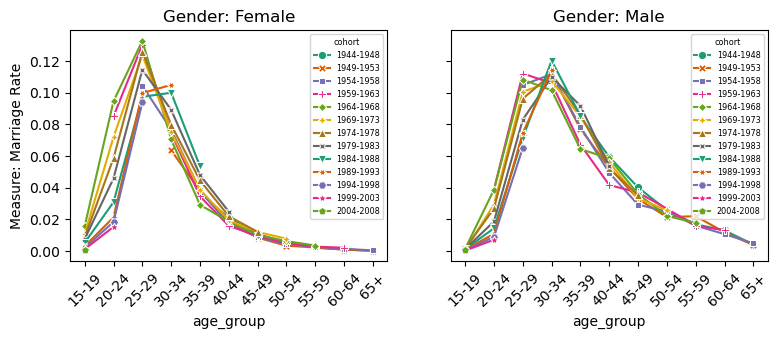

In [6]:
fig, axs = plot_multicol_data(df_cohort.loc[:,df_cohort.xs(('Female', 'Marriage Rate', ), 1, ('gender', 'measure', )).iloc[:,-61::5].columns], x_level='gender', y_level='measure')
fig.savefig(f'./rate_{dataset_mode}.svg', transparent=False, format='svg', bbox_inches='tight')
plt.show()
fig.clf()
plt.close()